In [0]:
# Facebook stock prediction
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [41]:
from google.colab import files
uploaded = files.upload()

Saving MSFT.csv to MSFT.csv


In [42]:
msftdata = pd.read_csv('MSFT.csv', parse_dates=True)
msftdata



,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-09-10,108.839996,109.639999,108.360001,109.379997,107.687813,20727900
1,2018-09-11,108.900002,111.589996,108.889999,111.239998,109.519043,24301800
2,2018-09-12,111.430000,111.849998,110.510002,111.709999,109.981766,18891100
3,2018-09-13,112.120003,113.730003,112.120003,112.910004,111.163208,26055600
4,2018-09-14,113.360001,113.730003,112.440002,113.370003,111.616089,19122300
5,2018-09-17,113.690002,113.699997,111.860001,112.139999,110.405121,20736500
6,2018-09-18,112.190002,113.699997,111.720001,113.209999,111.458572,22170900
7,2018-09-19,113.050003,113.320000,111.040001,111.699997,109.971924,21728400
8,2018-09-20,112.279999,113.800003,111.930000,113.570000,111.812996,23714500
9,2018-09-21,114.000000,115.290001,113.510002,114.260002,112.492317,71229700


In [43]:
msftdata.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [44]:
msftdata.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,118.865618,119.896693,117.611873,118.829522,117.902221,2.945602e+07
std,12.749257,12.617673,12.869335,12.731101,13.128732,1.277572e+07
min,95.139999,97.970001,93.959999,94.129997,93.074097,8.688020e+06
25%,107.825001,108.859996,106.125000,107.549999,106.065052,2.080140e+07
50%,114.800003,115.680000,114.440002,115.150002,113.699112,2.654560e+07
75%,131.689995,132.625000,130.745003,131.795006,131.357590,3.345830e+07
max,141.500000,141.679993,140.300003,141.339996,140.870895,1.112421e+08


In [45]:
msftdata.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-09-10,108.839996,109.639999,108.360001,109.379997,107.687813,20727900
1,2018-09-11,108.900002,111.589996,108.889999,111.239998,109.519043,24301800
2,2018-09-12,111.430000,111.849998,110.510002,111.709999,109.981766,18891100
3,2018-09-13,112.120003,113.730003,112.120003,112.910004,111.163208,26055600
4,2018-09-14,113.360001,113.730003,112.440002,113.370003,111.616089,19122300


In [46]:
df = pd.DataFrame(msftdata, columns=['Date','Open','High','Low','Close', 'Adj Close', 'Volume'])
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-09-10,108.839996,109.639999,108.360001,109.379997,107.687813,20727900
1,2018-09-11,108.900002,111.589996,108.889999,111.239998,109.519043,24301800
2,2018-09-12,111.430000,111.849998,110.510002,111.709999,109.981766,18891100
3,2018-09-13,112.120003,113.730003,112.120003,112.910004,111.163208,26055600
4,2018-09-14,113.360001,113.730003,112.440002,113.370003,111.616089,19122300


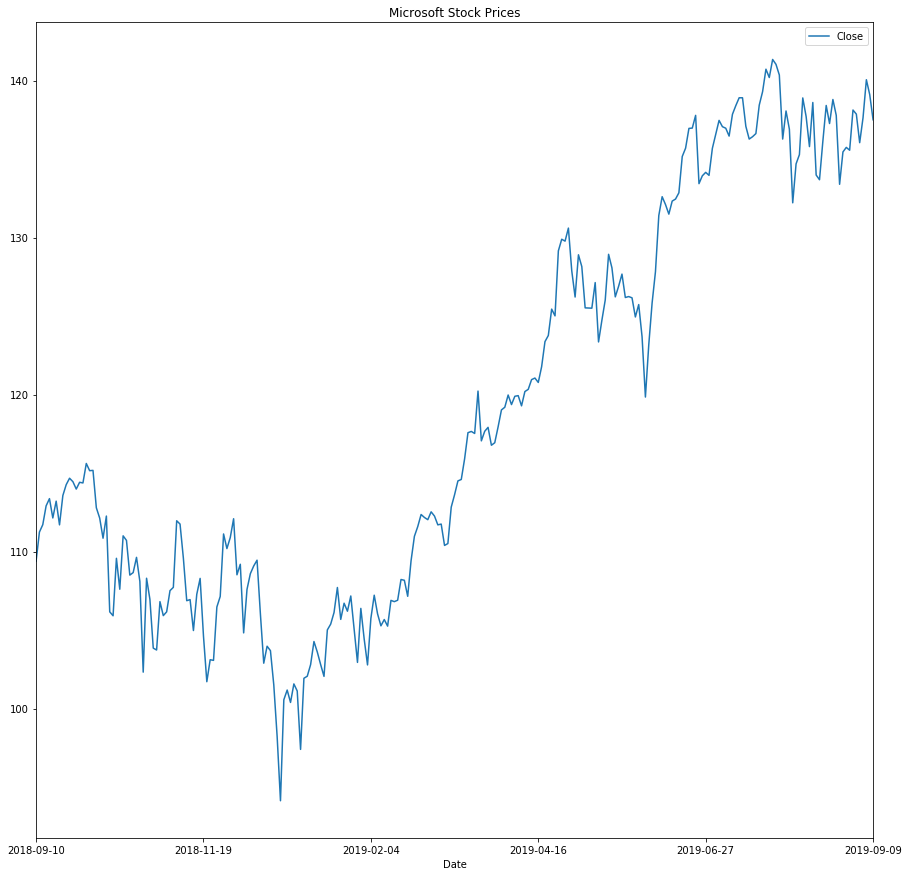

In [47]:
df.plot(x='Date', y='Close', title='Microsoft Stock Prices', figsize=(15,15))

In [48]:
dfreg = df.loc[:,['Adj Close','Volume']]
dfreg['L_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0
dfreg['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0
dfreg

,Adj Close,Volume,L_PCT,PCT_change
0,107.687813,20727900,1.170230,0.496142
1,109.519043,24301800,2.427182,2.148757
2,109.981766,18891100,1.199531,0.251278
3,111.163208,26055600,1.425914,0.704603
4,111.616089,19122300,1.137868,0.008823
5,110.405121,20736500,1.640803,-1.363359
6,111.458572,22170900,1.748959,0.909169
7,109.971924,21728400,2.041181,-1.194167
8,111.812996,23714500,1.646564,1.148914
9,112.492317,71229700,1.557850,0.228072


In [58]:
dfreg.fillna(value=-99999, inplace=True)

X = np.array(dfreg.drop(columns=['Adj Close']))
y = np.array(dfreg['Adj Close'])
X = preprocessing.scale(X)
dates = np.array(df['Date'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01)
dates_train, dates_test = dates[:248],dates[248:]
X_train.shape, X_test.shape, y_train.shape, y_test.shape, dates_train.shape, dates_test.shape

((248, 3), (3, 3), (248,), (3,), (248,), (3,))

<Figure size 432x288 with 0 Axes>

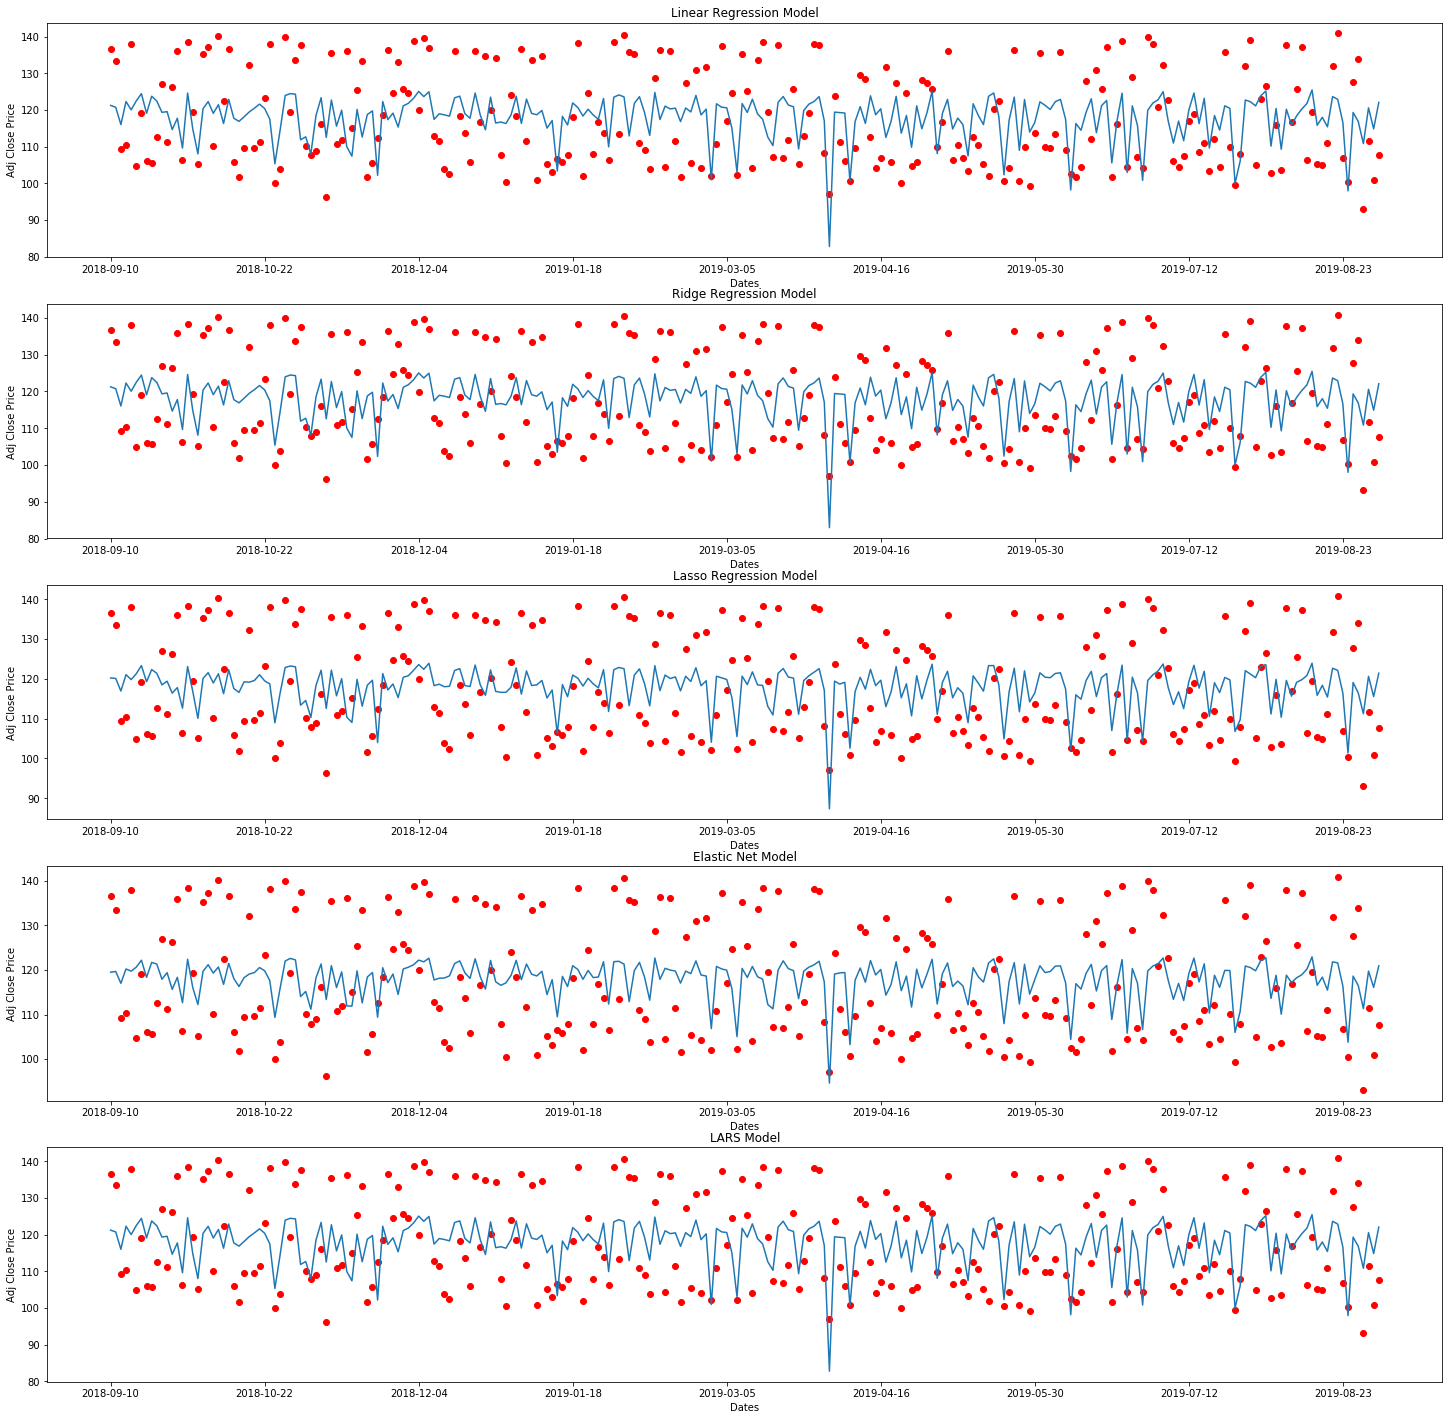

In [63]:
LinearRegressionModel = linear_model.LinearRegression()
RidgeRegressionModel = linear_model.Ridge()
LassoRegressionModel = linear_model.Lasso()
ElasticNetModel = linear_model.ElasticNet()
LarsModel = linear_model.Lars()
model_names = ['Linear Regression','Ridge Regression','Lasso Regression', 'Elastic Net','Lars Model']
models = [LinearRegressionModel, RidgeRegressionModel, LassoRegressionModel, ElasticNetModel, LarsModel]
LinearRegressionModel.fit(X_train, y_train)
RidgeRegressionModel.fit(X_train, y_train)
LassoRegressionModel.fit(X_train, y_train)
ElasticNetModel.fit(X_train, y_train)
LarsModel.fit(X_train, y_train)


#Drawing Hypothesis over the Training data

plt.subplots_adjust(hspace=0.9)
f = plt.figure(figsize=(25,25))

sp1 = plt.subplot(5,1,1)
plt.title('Linear Regression Model')
sp1.scatter(dates_train, y_train, color='r', label='Datapoints')
plt.ylabel('Adj Close Price')
plt.xlabel('Dates')
plt.xticks(np.arange(0, len(dates_train), step=30))
sp1.plot(dates_train, LinearRegressionModel.predict(X_train), label='Hypothesis/Predicted data')

plt.subplot(5,1,2)
plt.title('Ridge Regression Model')
plt.scatter(dates_train, y_train, color='r', label='Datapoints')
plt.ylabel('Adj Close Price')
plt.xlabel('Dates')
plt.xticks(np.arange(0, len(dates_train), step=30))
plt.plot(dates_train, RidgeRegressionModel.predict(X_train), label='Hypothesis/Predicted data')

plt.subplot(5,1,3)
plt.title('Lasso Regression Model')
plt.scatter(dates_train, y_train, color='r', label='Datapoints')
plt.ylabel('Adj Close Price')
plt.xlabel('Dates')
plt.xticks(np.arange(0, len(dates_train), step=30))
plt.plot(dates_train, LassoRegressionModel.predict(X_train), label='Hypothesis/Predicted data')

plt.subplot(5,1,4)
plt.title('Elastic Net Model')
plt.scatter(dates_train, y_train, color='r', label='Datapoints')
plt.ylabel('Adj Close Price')
plt.xlabel('Dates')
plt.xticks(np.arange(0, len(dates_train), step=30))
plt.plot(dates_train, ElasticNetModel.predict(X_train), label='Hypothesis/Predicted data')

plt.subplot(5,1,5)
plt.title('LARS Model')
plt.scatter(dates_train, y_train, color='r', label='Datapoints')
plt.ylabel('Adj Close Price')
plt.xlabel('Dates')
plt.xticks(np.arange(0, len(dates_train), step=30))
plt.plot(dates_train, LarsModel.predict(X_train), label='Hypothesis/Predicted data')

plt.show()

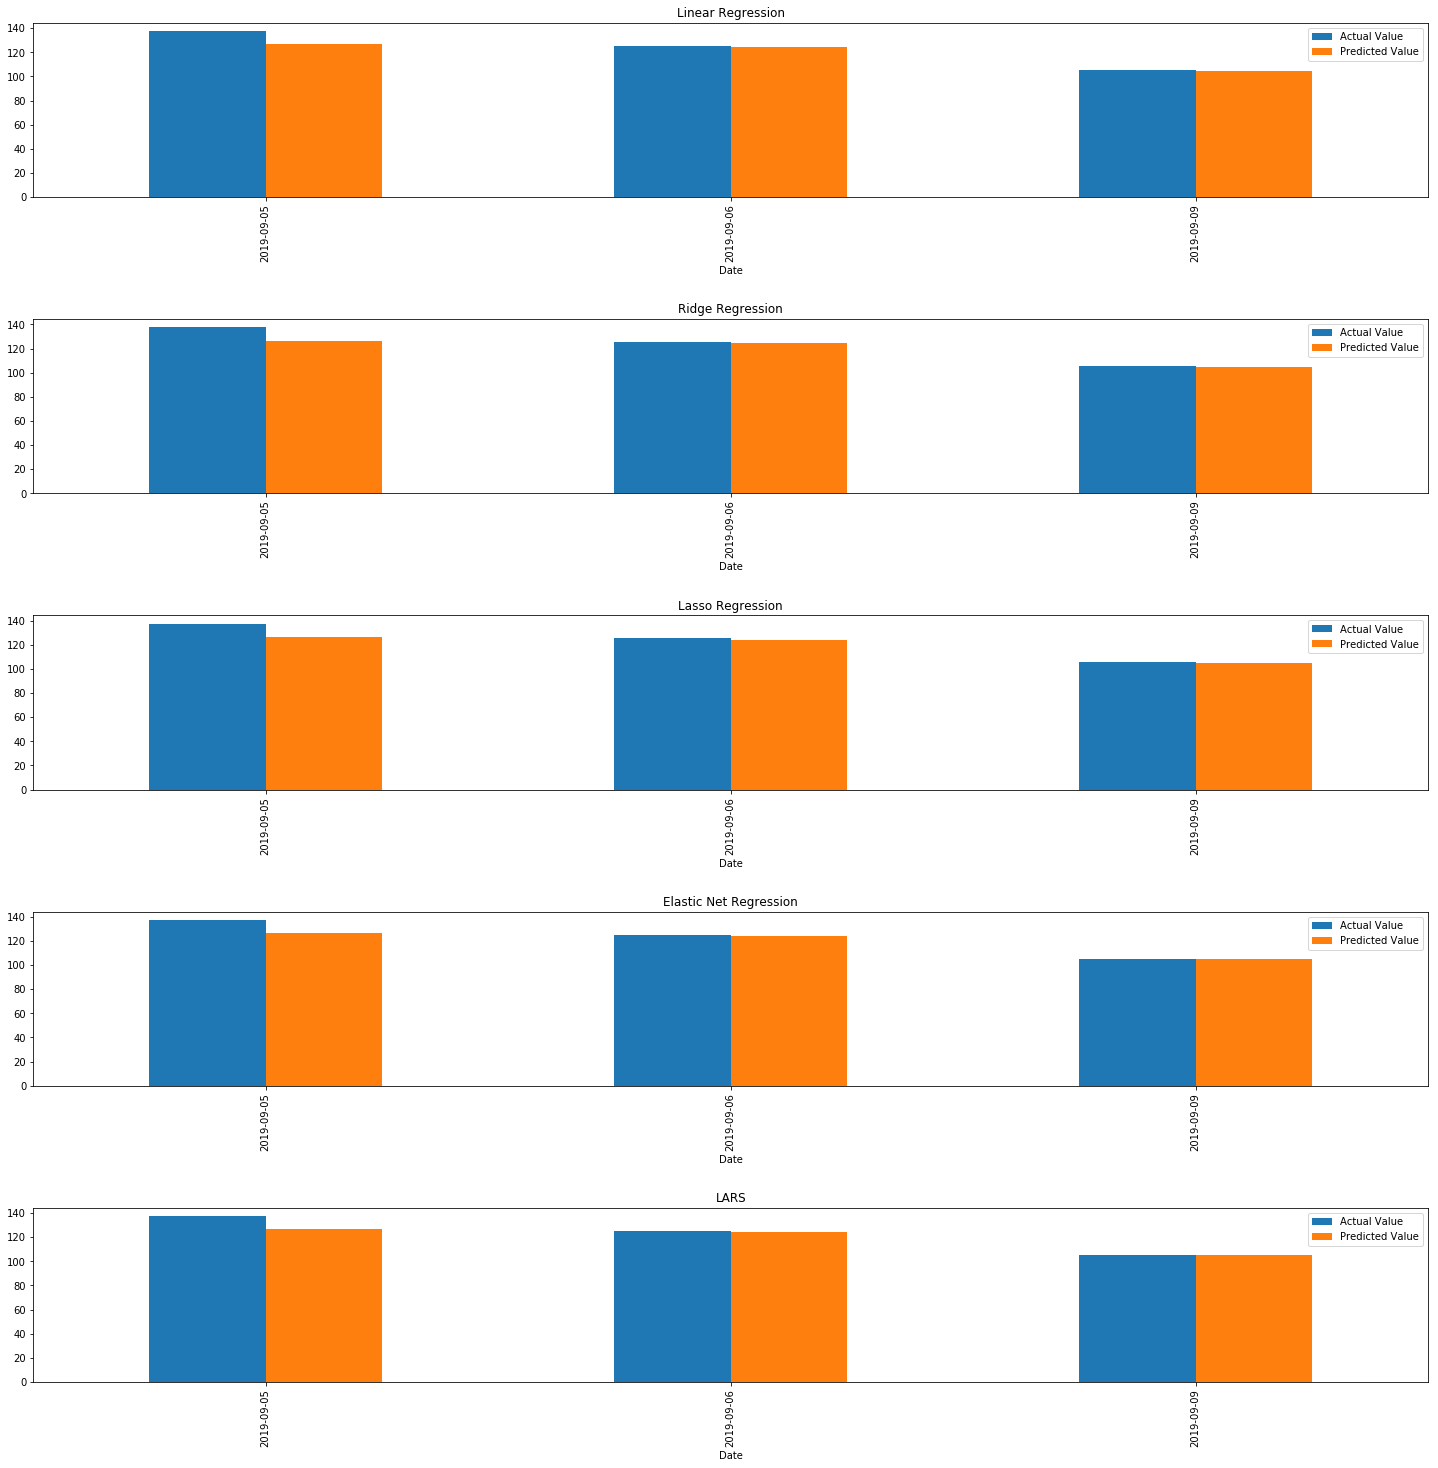

In [60]:
#Comparing actual values to the predicted values
LinRegDataFrame = pd.DataFrame()
LinRegDataFrame['Date'] = dates_test
LinRegDataFrame['Actual Value'] = y_test
LinRegDataFrame['Predicted Value'] = LinearRegressionModel.predict(X_test)

RidgeRegDataFrame = pd.DataFrame()
RidgeRegDataFrame['Date'] = dates_test
RidgeRegDataFrame['Actual Value'] = y_test
RidgeRegDataFrame['Predicted Value'] = RidgeRegressionModel.predict(X_test)

LassoRegDataFrame = pd.DataFrame()
LassoRegDataFrame['Date'] = dates_test
LassoRegDataFrame['Actual Value'] = y_test
LassoRegDataFrame['Predicted Value'] = LinearRegressionModel.predict(X_test)

ElasticNetRegDataFrame = pd.DataFrame()
ElasticNetRegDataFrame['Date'] = dates_test
ElasticNetRegDataFrame['Actual Value'] = y_test
ElasticNetRegDataFrame['Predicted Value'] = LinearRegressionModel.predict(X_test)

LarsRegDataFrame = pd.DataFrame()
LarsRegDataFrame['Date'] = dates_test
LarsRegDataFrame['Actual Value'] = y_test
LarsRegDataFrame['Predicted Value'] = LinearRegressionModel.predict(X_test)


f = plt.figure(figsize=(25,25))
plt.subplots_adjust(hspace=0.7)
sp1 = f.add_subplot(511, title='Linear Regression')
LinRegDataFrame.plot(x='Date', y=['Actual Value', 'Predicted Value'], kind='bar', ax=sp1)

sp2 = f.add_subplot(512, title='Ridge Regression')
RidgeRegDataFrame.plot(x='Date', y=['Actual Value', 'Predicted Value'], kind='bar', ax=sp2)

sp3 = f.add_subplot(513, title='Lasso Regression')
LassoRegDataFrame.plot(x='Date', y=['Actual Value', 'Predicted Value'], kind='bar', ax=sp3)

sp4 = f.add_subplot(514, title='Elastic Net Regression')
ElasticNetRegDataFrame.plot(x='Date', y=['Actual Value', 'Predicted Value'], kind='bar', ax=sp4)

sp5 = f.add_subplot(515, title='LARS')
LarsRegDataFrame.plot(x='Date', y=['Actual Value', 'Predicted Value'], kind='bar', ax=sp5)

plt.show()

In [65]:
scores = []
for i in range(5):
    scores.append(models[i].score(X_train, y_train))
    
scoresDataFrame = pd.DataFrame()
scoresDataFrame['Name'] = model_names
scoresDataFrame['Score'] = scores
scoresDataFrame

,Name,Score
0,Linear Regression,0.213887
1,Ridge Regression,0.213884
2,Lasso Regression,0.204959
3,Elastic Net,0.190281
4,Lars Model,0.213887


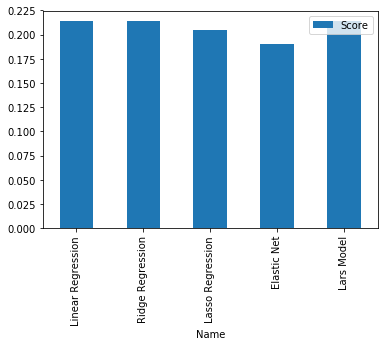

In [66]:
scoresDataFrame.plot(x='Name', y='Score', kind='bar')